# LAB-3

Logistic regression from scratch

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Loading data
socialNetwork = pd.read_csv("./Social_Network_Ads.csv")

# Preprocessing

LabelEncoding = LabelEncoder()

socialNetwork["Gender"] = LabelEncoding.fit_transform(socialNetwork["Gender"])

# Features and Target values
features = socialNetwork[["Gender", "Age", "EstimatedSalary"]].values
target = socialNetwork["Purchased"].values

# Splitting into the train and test datasets

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# scaling the features
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# LOGISTIC REGRESSION 
class LogisticRegression:
    def __init__(self, learningRate= 0.01, iterations = 1000):
        self.lr = learningRate
        self.iterations = iterations
        self.weights = None
        self.bias = None
    def sigmoid(self,z):
        return 1/(1 +np.exp(-z)) 
    
    def fit(self, features, target):
        num_samples, num_features = features.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for i in range (self.iterations):
            linear_model = np.dot(features, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            dw = (1/ num_samples) * np.dot(features.T, (y_predicted - target))
            db = (1/ num_samples) * np.sum(y_predicted - target)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    def predict(self, features):
        linear_model = np.dot(features, self.weights) + self.bias   
        return [ 1 if i > 0.5 else 0 for i in self.sigmoid(linear_model)]

# Training
model = LogisticRegression( learningRate= 0.1, iterations= 1000)
model.fit(features_train, target_train)

# Evaluations
predictions = model.predict(features_test)
print ( "Accuracy:", accuracy_score(target_test, predictions))
print( "Confusion metrics: \n", confusion_matrix(target_test, predictions))
print( "Calculation Report: \n", classification_report(target_test, predictions))

Accuracy: 0.8875
Confusion metrics: 
 [[50  2]
 [ 7 21]]
Calculation Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



logistic regression with library

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading Dataset

socialdata = pd.read_csv("./Social_Network_Ads.csv")

# Preprocessing

le = LabelEncoder()
socialdata["Gender"] = le.fit_transform(socialdata["Gender"])

# Features and Target values
features = socialdata[["Gender", "Age", "EstimatedSalary"]].values
target = socialdata["Purchased"].values

# Splitting into the train and test datasets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)


# scaling the features
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# Linear regression
mpdel = LogisticRegression()
model.fit = (features_train, target_train)

# predictions

target_predictions = model.predict(features_test)

print ( "Accuracy:", accuracy_score(target_test, predictions))
print( "Confusion metrics: \n", confusion_matrix(target_test, predictions))
print( "Calculation Report: \n", classification_report(target_test, predictions))

Accuracy: 0.8875
Confusion metrics: 
 [[50  2]
 [ 7 21]]
Calculation Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



Polynomial Regression

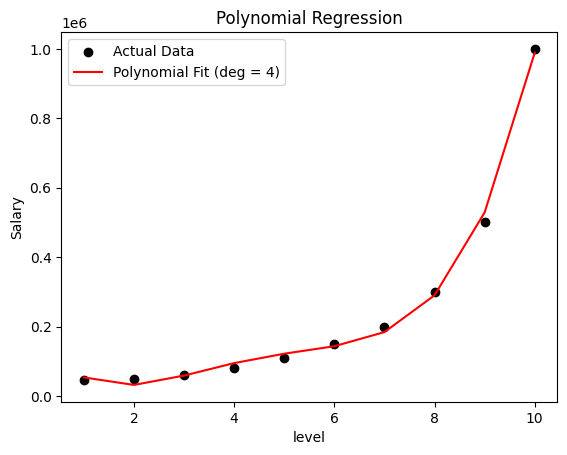

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv("./Position_Salaries.csv")

features = data[["Level"]].values
target = data[["Salary"]].values

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(features)

poly_model = LinearRegression()
poly_model.fit(X_poly, target)

y_predictions = poly_model.predict(X_poly)

plt.scatter(features,target, color = "black", label = "Actual Data")
plt.plot(features, y_predictions, color = "red", label = "Polynomial Fit (deg = 4)")
plt.xlabel("level")
plt.ylabel("Salary")
plt.title("Polynomial Regression")
plt.legend()
plt.show()